<Figure size 432x288 with 0 Axes>

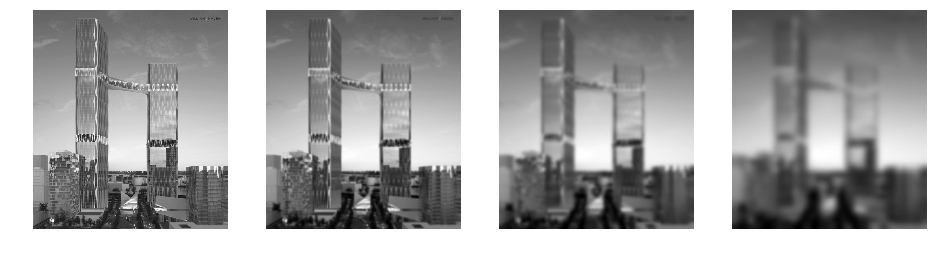

In [6]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters
from pylab import *

im = array(Image.open('./data/skyscraper.jpg').convert('L'))
im1 = filters.gaussian_filter(im,2)
im2 = filters.gaussian_filter(im,5)
im3 = filters.gaussian_filter(im,10)

gray()
fig, axs = subplots(1, 4, figsize=(16, 16))
axs[0].imshow(im)
axs[0].axis('off')
axs[1].imshow(im1)
axs[1].axis('off')
axs[2].imshow(im2)
axs[2].axis('off')
axs[3].imshow(im3)
axs[3].axis('off')
show()

In [7]:
#Sobel derivative filters
imx = zeros(im.shape)
filters.sobel(im,1,imx)
imy = zeros(im.shape)
filters.sobel(im,0,imy)
magnitude = sqrt(imx**2+imy**2)

<Figure size 432x288 with 0 Axes>

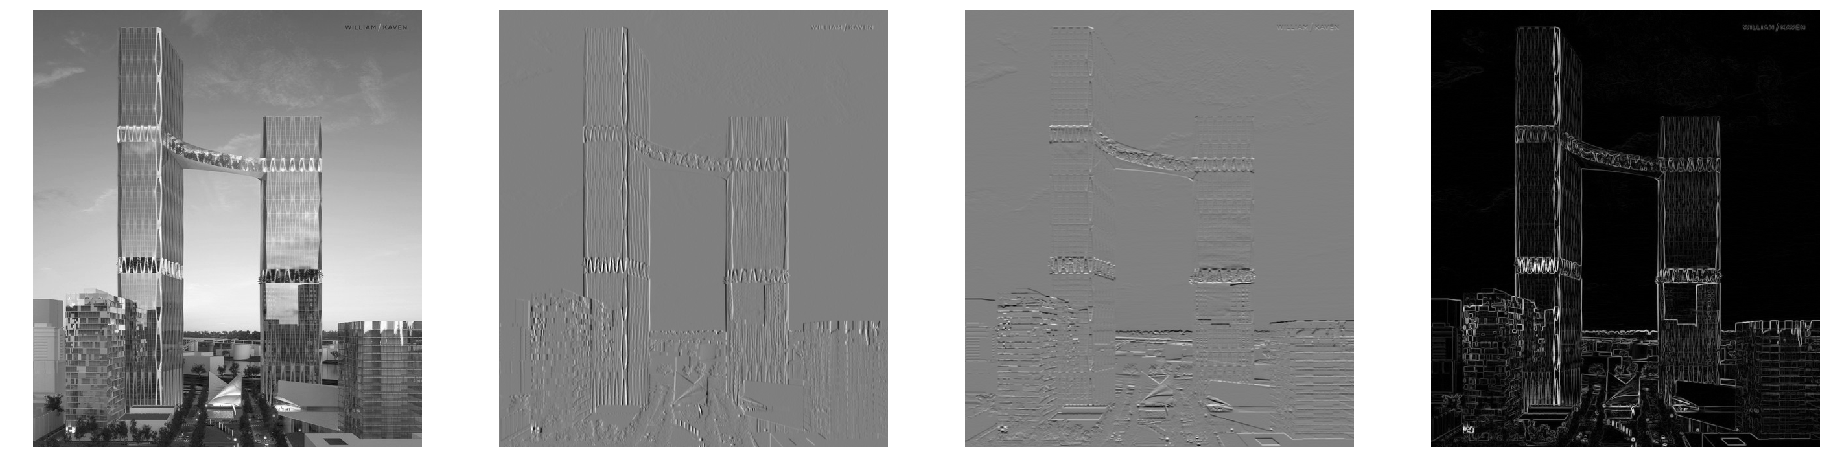

In [8]:
gray()
fig, axs = subplots(1, 4, figsize=(32, 32))
axs[0].imshow(im)
axs[0].axis('off')
axs[1].imshow(imx)
axs[1].axis('off')
axs[2].imshow(imy)
axs[2].axis('off')
axs[3].imshow(magnitude)
axs[3].axis('off')
show()

<Figure size 432x288 with 0 Axes>

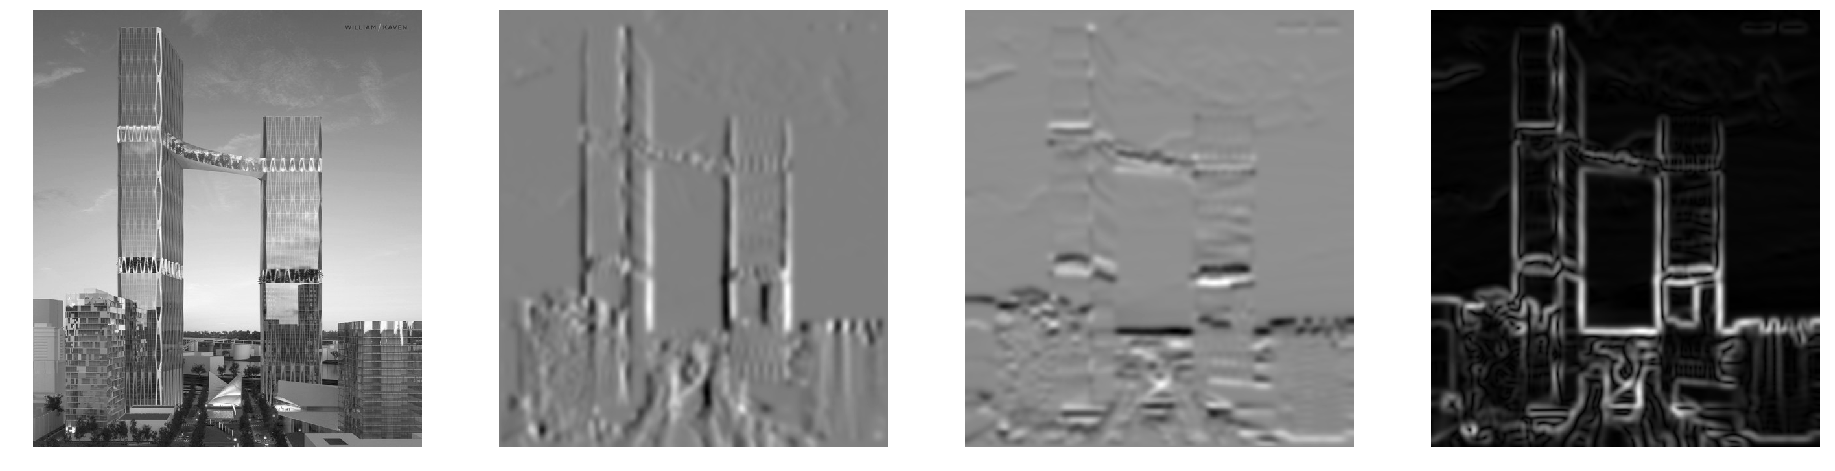

In [9]:
sigma = 5 #standard deviation
imx = zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)
imy = zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)
magnitude = sqrt(imx**2+imy**2)
gray()
fig, axs = subplots(1, 4, figsize=(32, 32))
axs[0].imshow(im)
axs[0].axis('off')
axs[1].imshow(imx)
axs[1].axis('off')
axs[2].imshow(imy)
axs[2].axis('off')
axs[3].imshow(magnitude)
axs[3].axis('off')
show()

In [12]:
from scipy.ndimage import measurements,morphology
"""
This is the morphology counting objects example in Section 1.4.
"""

# load image and threshold to make sure it is binary
im = array(Image.open('./data/dot.png').convert('L'))
bim = (im<128)

labels, nbr_objects = measurements.label(bim)
print("Number of objects:", nbr_objects)

# morphology - opening to separate objects better
im_open = morphology.binary_opening(bim, ones((5,5)), iterations=2) 

labels_open, nbr_objects_open = measurements.label(im_open)
print("Number of objects:", nbr_objects_open)

Number of objects: 72
Number of objects: 50


<Figure size 432x288 with 0 Axes>

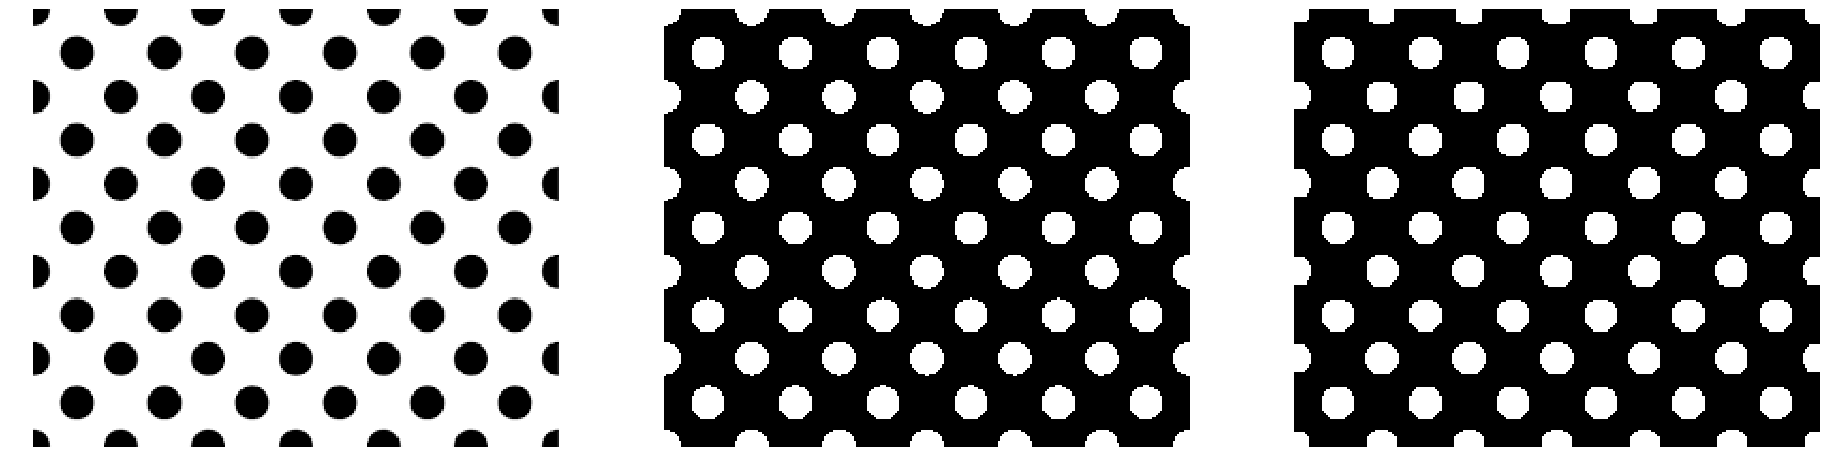

In [11]:
gray()
fig, axs = subplots(1, 3, figsize=(32, 32))
axs[0].imshow(im)
axs[0].axis('off')
axs[1].imshow(bim)
axs[1].axis('off')
axs[2].imshow(im_open)
axs[2].axis('off')
show()